In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import PyPDF2
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

pdf = open("JavaBasics-notes.pdf",'rb')
pdf_read = PyPDF2.PdfFileReader(pdf)

In [2]:
no_of_page = pdf_read.numPages
count = 0
text = ""

while count < no_of_page:
    page = pdf_read.getPage(count)
    count +=1
    text += page.extractText()

In [3]:
tokens = word_tokenize(text.lower())
stop_word = stopwords.words('english')
punctuations = ['(',')',';',':','[',']',',',"!",".","``","}","{",'``',"-","$","<",">",':',':',':',"/","\\","+","[","]",".","=","==","&","$",'||','{',
'|','}',"''"]
len(tokens)

4952

In [8]:
for word in tokens:
    for stop in stop_word:
        if word==stop_word: #remove stop word
            tokens.remove(word)
        
    for symbol in punctuations:#remove punctuation
        if word==symbol: #remove stop word
            tokens.remove(word)
        

for word in tokens:#remove words with less words (overwiew shows all are punctuations with arbitaration)
    if len(word) <= 3:
        tokens.remove(word)
len(tokens)        

2262

In [12]:
for word in tokens:
    for symbol in punctuations:
        if word.find(symbol)>-1:
            try:
                tokens.remove(word)
            except:
                pass
len(tokens)

1970

In [16]:
numbers=["0","1","2","3","4","5","6","7","8","9"]
for word in tokens:
    for number in numbers:
        if word.find(number)>-1:
            try:
                tokens.remove(word)
            except:
                pass
len(tokens)

1944

In [17]:
dictionary={}
for word in tokens:
    if word in dictionary:
        dictionary[word]+=1
    else:
        dictionary[word]=1
        
#again filtering the dictionaory
for word in stop_word:
    if word in dictionary:
        dictionary.pop(word)

In [19]:
result_keyword_csv=pd.DataFrame(sorted(dictionary.items(), key=lambda kv: kv[1], reverse=True))
result_keyword_csv=result_keyword_csv.to_csv("result_keyword_list.csv",encoding="utf-8",header=["Keyword","Frequency"],index=False)

In [23]:
#visualization of the keyword
dataframe=pd.read_csv("result_keyword_list.csv")
dataframe=dataframe[0:5] #top 5 key words


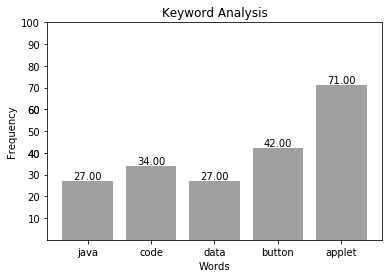

In [24]:
# Plot the figure.
fig, ax = plt.subplots()
ax.bar(dataframe["Keyword"],dataframe["Frequency"],color='gray',alpha=0.75)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Keyword Analysis")
plt.yticks([10,20,30,40,50,60,40,60,70,80,90,100])
plt.xticks(dataframe["Keyword"])

rects = ax.patches

# Make some labels.
labels = ["%0.2f" % i for i in dataframe["Frequency"]]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')
plt.savefig("Results.png",dpi=300)
plt.show()
